In [2]:
import navis 
import pandas as pd

from pathlib import Path
from tqdm import tqdm 

In [19]:
def load_dotprops_csv(fp):
    """Load dotprops from CSV files in filepath `fp`."""
    # Turn into a path object 
    fp = Path(fp).expanduser()
    
    # Go over each CSV file
    files = list(fp.glob('*.csv'))     
    dotprops = []
    for f in tqdm(files, desc='Loading dotprops', leave=False):
        # Read file 
        csv = pd.read_csv(f)
        
        # Each row is a point with associated vector 
        pts = csv[['pt_x', 'pt_y', 'pt_z']].values
        vect = csv[['vec_x', 'vec_y', 'vec_z']].values
        
        # Turn into a Dotprops        
        dp = navis.Dotprops(points=pts, k=20, vect=vect, units='1 micron')
        
        # Use filename as ID/name
        dp.name = dp.id = f.name[:-4]
        
        # Add this dotprop to the list before moving on to the next
        dotprops.append(dp)
    
    return navis.NeuronList(dotprops)
    
fc_dps = load_dotprops_csv('~/Downloads/flycircuit_dotprops')
fc_dps

,type,name,id,k,units,n_points
0,navis.Dotprops,DvGlutMARCM-F1822_seg2,DvGlutMARCM-F1822_seg2,20,1 micrometer,87
1,navis.Dotprops,DvGlutMARCM-F002216_seg001,DvGlutMARCM-F002216_seg001,20,1 micrometer,2574
...,...,...,...,...,...,...
16127,navis.Dotprops,GadMARCM-F000020_seg001,GadMARCM-F000020_seg001,20,1 micrometer,477
16128,navis.Dotprops,DvGlutMARCM-F1720_seg1,DvGlutMARCM-F1720_seg1,20,1 micrometer,941


In [4]:
fc_dps[0]

,
type,navis.Dotprops
name,FruMARCM-M002262_seg001
id,FruMARCM-M002262_seg001
k,5
units,1 micrometer
n_points,4121


In [44]:
# Load some of the example neurons
n = navis.example_neurons(3)

In [45]:
# Convert from hemibrain (JRCFIB2018Fraw) to FCWB space
import flybrains

n_fcwb = navis.xform_brain(n, source='JRCFIB2018Fraw', target='FCWB')

Transform path: JRCFIB2018Fraw -> JRCFIB2018F -> JRCFIB2018Fum -> JRC2018F -> FCWB


Plot neurons:   0%|          | 0/3 [00:00<?, ?it/s]

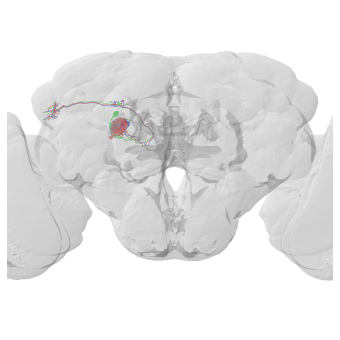

In [46]:
# A sanity check to make sure the transform worked
fig, ax = navis.plot2d([n_fcwb, flybrains.FCWB])

# Rotate to front view
ax.elev = -90

# Zoom in a little
ax.dist = 4

In [47]:
# Mirror neurons from the right to the left
# (FlyCircuit neurons are supposed to all be on the left)
n_fcwb_mirr = navis.mirror_brain(n_fcwb, template='FCWB')

In [48]:
# Convert to dotprops
n_dps = navis.make_dotprops(n_fcwb_mirr, resample=1, k=None)

In [ ]:
# Run a "smart" NBLAST to get the top hits
# (ignore the warning about data not being in microns - that's a rounding error from the transform)
scores = navis.nblast_smart(query=n_dps, target=fc_dps, scores='mean', progress=False)

In [50]:
scores.head()

,FruMARCM-M002262_seg001,FruMARCM-M002262_seg002,FruMARCM-M002278_seg001,FruMARCM-M002287_seg001,FruMARCM-M002507_seg001,FruMARCM-M002522_seg001,FruMARCM-M002578_seg001,FruMARCM-M002578_seg002,FruMARCM-M002579_seg001,FruMARCM-M002579_seg002,...,DvGlutMARCM-F594-X2_seg1,DvGlutMARCM-F594-X2_seg2,DvGlutMARCM-F595_seg1,DvGlutMARCM-F596_seg1,DvGlutMARCM-F597_seg1,DvGlutMARCM-F598_seg1,DvGlutMARCM-F599_seg1,DvGlutMARCM-F599_seg2,DvGlutMARCM-F600-X2_seg1,DvGlutMARCM-F600-X2_seg2
1734350788,-0.260213,-0.200286,-0.645926,-0.639277,-0.663507,-0.451059,-0.229996,-0.604237,-0.705247,-0.307929,...,-0.881092,-0.648820,-0.660410,0.118524,-0.315490,-0.671891,-0.499438,-0.882007,-0.882510,-0.880825
1734350908,-0.267769,-0.191842,-0.655194,-0.623617,-0.679471,-0.459428,-0.233066,-0.607806,-0.715372,-0.310166,...,-0.881365,-0.654605,-0.669929,0.113844,-0.316001,-0.682929,-0.505106,-0.881421,-0.881361,-0.882250
722817260,-0.270642,-0.170228,-0.680244,-0.667571,-0.670850,-0.431723,-0.236943,-0.634743,-0.704928,-0.298078,...,-0.881398,-0.649228,-0.659683,0.132546,-0.317336,-0.627997,-0.503828,-0.882124,-0.881570,-0.881419


In [39]:
# Find the top hits for each of our query neurons
import numpy as np

for dp in n_dps:
    hit = scores.columns[np.argmax(scores.loc[dp.id].values)]
    sc = scores.loc[dp.id].values.max()
    print(f'Top hit for {dp.id}: {hit} ({sc:.3f})')    

Top hit for 1734350788: FruMARCM-F001496_seg001 (0.778)
Top hit for 1734350908: FruMARCM-F001496_seg001 (0.744)
Top hit for 722817260: FruMARCM-F001496_seg001 (0.792)


Plot neurons:   0%|          | 0/4 [00:00<?, ?it/s]

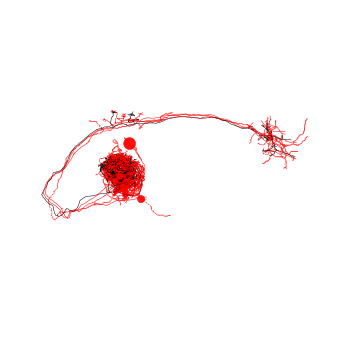

In [51]:
# Let's co-visualize:
# Queries in red, hit in black
fig, ax = navis.plot2d([n_fcwb_mirr, fc_dps.idx['FruMARCM-F001496_seg001']],
                       color=['r'] * len(n_fcwb_mirr) + ['k'])
ax.elev = -90